Group 116 <br>
Group Members: Danming Wang (5833587), Xing Su (4502266), Xilin Huang (5562194), Zhixin Liu (7445224), Li Guo (7593601), Wenrui Wang(5813373)

In [1]:
import math
import numpy as np
from sympy import *
t=Symbol('t')
omega=Symbol('omega')
theta=Symbol('theta')
import matplotlib
from matplotlib import pyplot

In [2]:
def RungeKuttaSystem(funcs,alphas,a,b,m,h,um):
    # Fourth order Runge-Kutta Method for Systems of Differential Equations
    for j in range(0,m):
        um[j]=lambdify(t,um[j])
    N=int((b-a)/h)
    tt=a
    wj=alphas.copy()
    k_table=np.zeros((4+1,m+1))
    tw=[[tt,alphas,alphas]]
    for i in range(1,N+1):
        for j in range(1,m+1):
            k_table[1][j]=h*funcs(j,tt,wj)
        for j in range(1,m+1):
            wj2=wj.copy()
            for k in range(0,m):
                wj2[k]=wj2[k]+1/2*k_table[1][k+1]
            k_table[2][j]=h*funcs(j,tt+h/2,wj2)
        for j in range(1,m+1):
            wj3=wj.copy()
            for k in range(0,m):
                wj3[k]=wj3[k]+1/2*k_table[2][k+1]
            k_table[3][j]=h*funcs(j,tt+h/2,wj3)
        for j in range(1,m+1):
            wj4=wj.copy()
            for k in range(0,m):  
                wj4[k]=wj4[k]+k_table[3][k+1]
            k_table[4][j]=h*funcs(j,tt+h,wj4)
        for j in range(1,m+1):
            wj[j-1]=wj[j-1]+(k_table[1][j]+2*k_table[2][j]+2*k_table[3][j]+k_table[4][j])/6
        tt=a+i*h
        um_exact=[]
        wjj=[]
        for j in range(0,m):
            um_exact.append(um[j](tt))
            wjj.append(wj[j])
        tw.append([tt,wjj,um_exact])
    
    return tw


$\begin{cases}
u_1'(t)&=u_2(t)\\
u_2'(t)&=-q\cdot u_2(t)-\frac{g}{l}\sin(u_1(t))+b_0\cdot \cos(w_Dt)
\end{cases}$

### Example 1 (non-chaotic)
$q=0.5$, $b_0=0.9$, $g=9.8,\ l=9.8,\ \omega_D=\frac{2}{3}$, $0\leq t\leq 100$, $h=0.1$, $u_1(0)=\theta(0)=0,\ u_2(0)=\theta'(0)=\omega(0)=1$.

Text(0, 0.5, '$\\theta$')

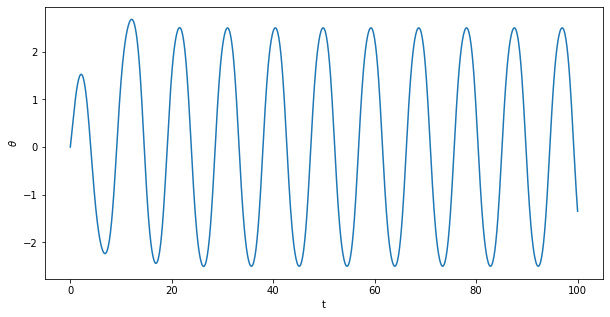

In [5]:
# example
q=0.5
wd=2/3
b0=0.9
g=9.8
l=9.8
def up(j,tt,wj):
    u1=wj[0]
    u2=wj[1]
    if j==1:
        return u2
    if j==2:
        return -q*u2-g/l*math.sin(u1)+b0*cos(wd*tt)
um=[t,t] # junk value
alphas=[0,1]
a=0
b=100
h=0.1
m=2
N=int((b-a)/h)
sol=RungeKuttaSystem(up,alphas,a,b,m,h,um)
ti=[]
thtai=[]
wi=[]
for i in range(0,N+1):
    ti.append(sol[i][0])
    thtai.append(sol[i][1][0])
    wi.append(sol[i][1][1])
pyplot.figure( figsize=( 10, 5 ) )
pyplot.plot(ti,thtai)
pyplot.xlabel('t')
pyplot.ylabel('$\\theta$')

Text(0, 0.5, '$\\omega$')

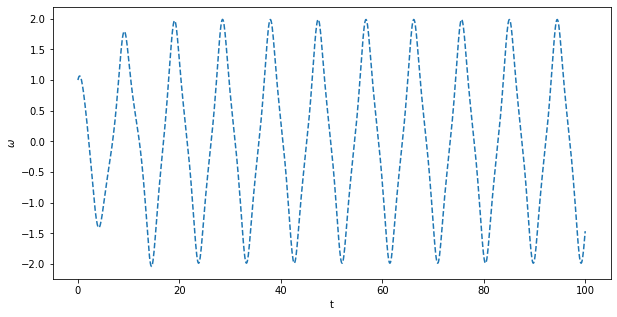

In [6]:
pyplot.figure( figsize=( 10, 5 ) )
pyplot.plot(ti, wi,"--")
pyplot.xlabel('t')
pyplot.ylabel('$\\omega$')

Text(0, 0.5, '$\\omega$')

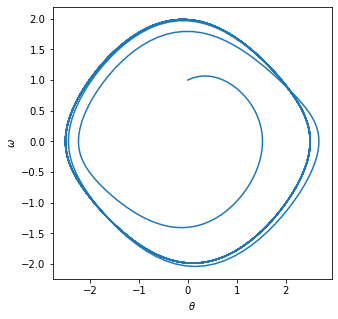

In [7]:
pyplot.figure( figsize=( 5, 5 ) )
pyplot.plot(thtai,wi)
pyplot.xlabel('$\\theta$')
pyplot.ylabel('$\\omega$')

### Example 2 (chaotic)
$q=0.5$, $b_0=1.15$, $g=9.8,\ l=9.8,\ \omega_D=\frac{2}{3}$, $0\leq t\leq 1000$, $h=0.1$, $u_1(0)=\theta(0)=0,\ u_2(0)=\theta'(0)=\omega(0)=1$.

Text(0, 0.5, '$\\theta$')

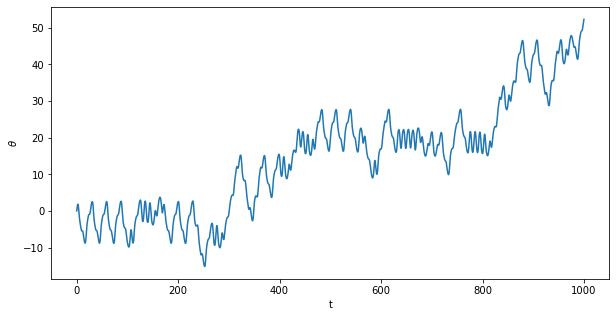

In [8]:
b0=1.15
def up(j,tt,wj):
    u1=wj[0]
    u2=wj[1]
    if j==1:
        return u2
    if j==2:
        return -q*u2-g/l*math.sin(u1)+b0*cos(wd*tt)
um=[t,t] # junk value
alphas=[0,1]
a=0
b=1000
h=0.1
m=2
N=int((b-a)/h)
sol=RungeKuttaSystem(up,alphas,a,b,m,h,um)
ti=[]
thtai=[]
wi=[]
for i in range(0,N+1):
    ti.append(sol[i][0])
    thtai.append(sol[i][1][0])
    wi.append(sol[i][1][1])
pyplot.figure( figsize=( 10, 5 ) )
pyplot.plot(ti,thtai)
pyplot.xlabel('t')
pyplot.ylabel('$\\theta$')


Text(0, 0.5, '$\\omega$')

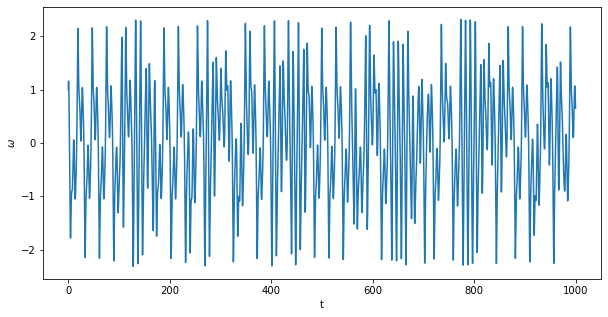

In [12]:
pyplot.figure( figsize=( 10, 5 ) )
pyplot.plot(ti, wi)
pyplot.xlabel('t')
pyplot.ylabel('$\\omega$')

Text(0, 0.5, '$\\omega$')

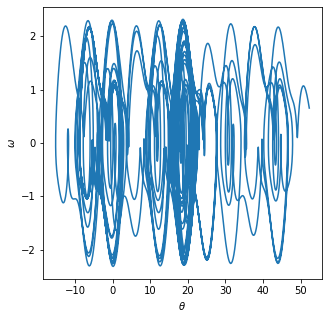

In [10]:
pyplot.figure( figsize=( 5, 5 ) )
pyplot.plot(thtai,wi)
pyplot.xlabel('$\\theta$')
pyplot.ylabel('$\\omega$')